<a href="https://colab.research.google.com/github/glatham1/ECGR_4105_MachineLearning/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

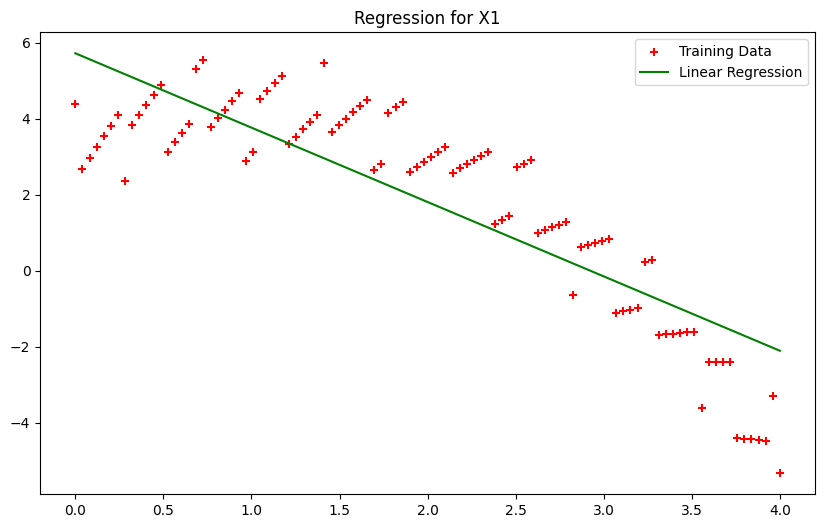

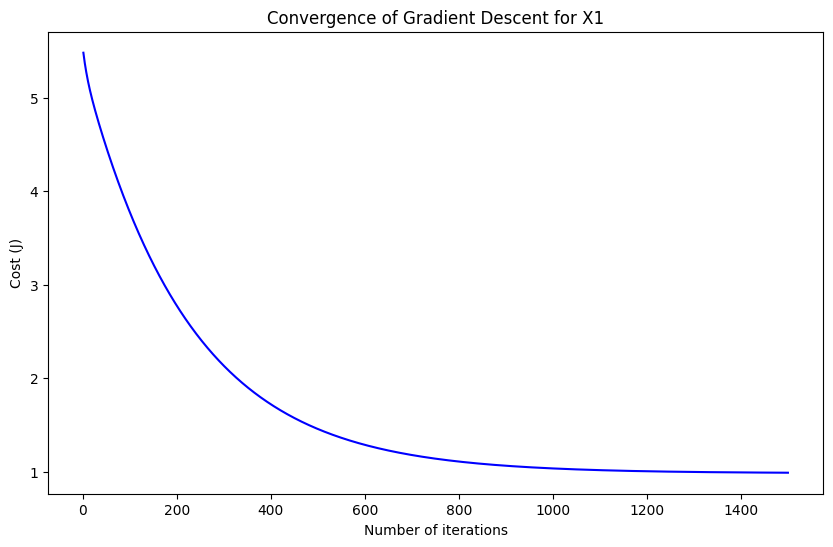

Linear model for X1: y = 5.718506528385593 + -1.9568205977732744*X1


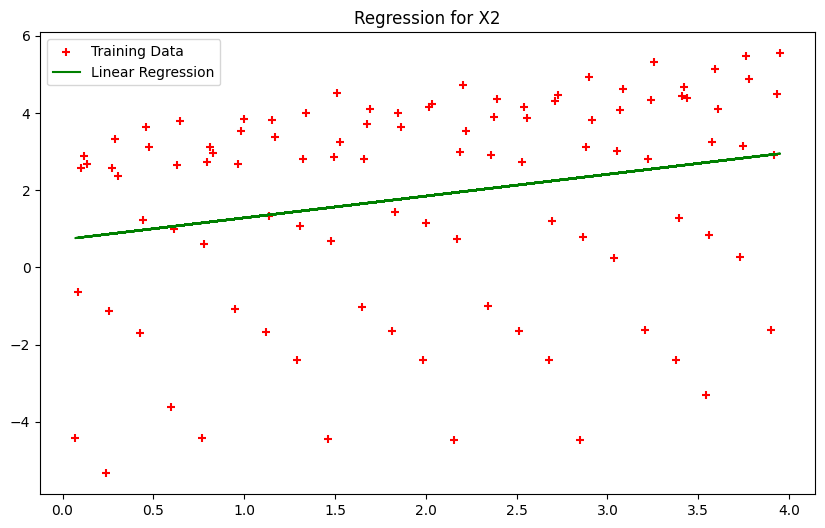

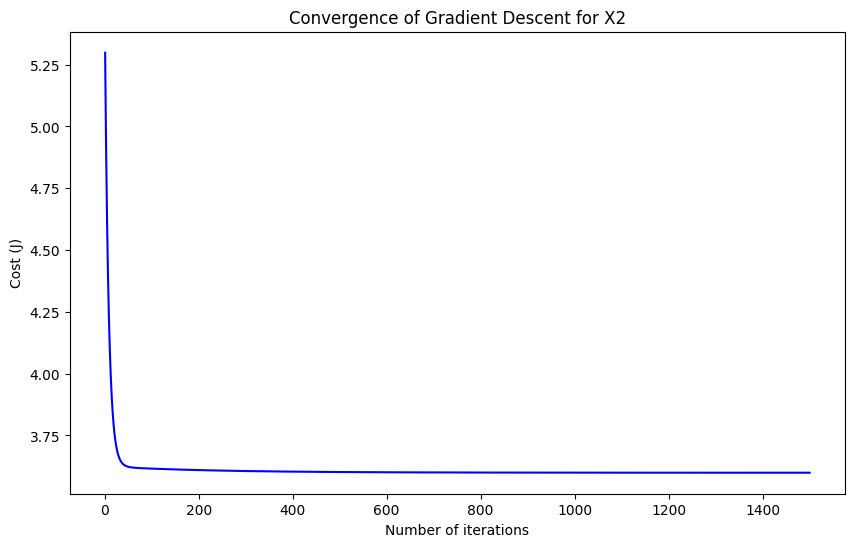

Linear model for X2: y = 0.7198847334502397 + 0.5639033419472831*X2


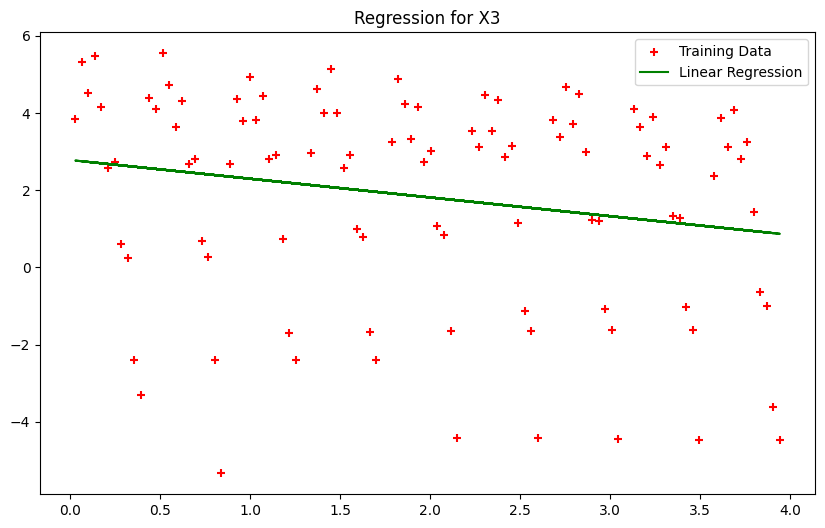

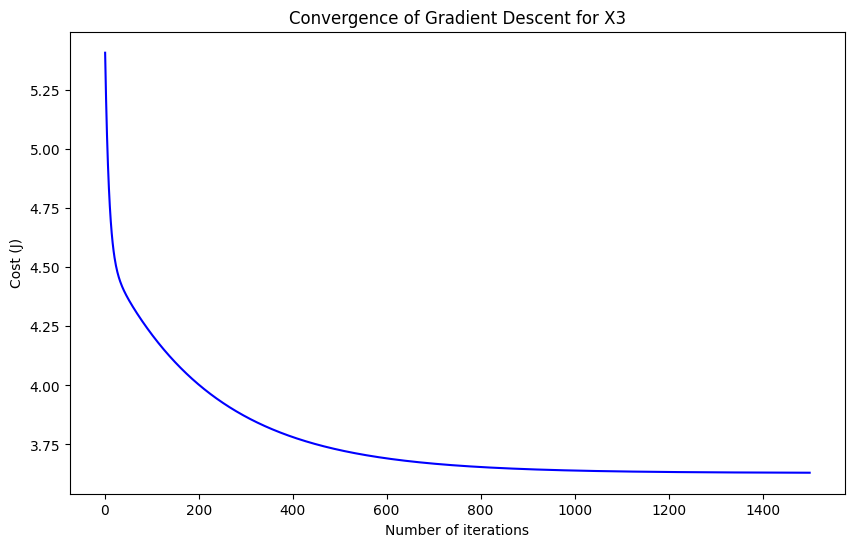

Linear model for X3: y = 2.7804812909944903 + -0.4845163094735121*X3


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('D3.csv')
m = df.shape[0]  # Number of training examples

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

def train_and_plot(X, y, feature_name, alpha=0.01, iterations=1500):
    # Prepare data
    X_0 = np.ones((m, 1))
    X = X.values.reshape(m, 1)
    X = np.hstack((X_0, X))

    # Initialize theta
    theta = np.zeros(2)

    # Gradient descent
    theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

    # Plot regression
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 1], y, color='red', marker='+', label='Training Data')
    plt.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')
    plt.title(f'Regression for {feature_name}')
    plt.legend()
    plt.show()

    # Plot loss over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, iterations + 1), cost_history, color='blue')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost (J)')
    plt.title(f'Convergence of Gradient Descent for {feature_name}')
    plt.show()

    return theta, cost_history[-1]

# Separating features and labels
y = df['Y'].values
features = ['X1', 'X2', 'X3']
results = {}

# For each feature, train model and plot
for feature in features:
    X_feature = df[feature]
    theta, final_cost = train_and_plot(X_feature, y, feature)
    results[feature] = (theta, final_cost)
    print(f'Linear model for {feature}: y = {theta[0]} + {theta[1]}*{feature}')


In [4]:
# Determine which variable gives the lowest cost
lowest_cost_feature = min(results, key=lambda k: results[k][1])
print(f'\n{lowest_cost_feature} has the lowest cost for explaining the output Y.')


X1 has the lowest cost for explaining the output Y.


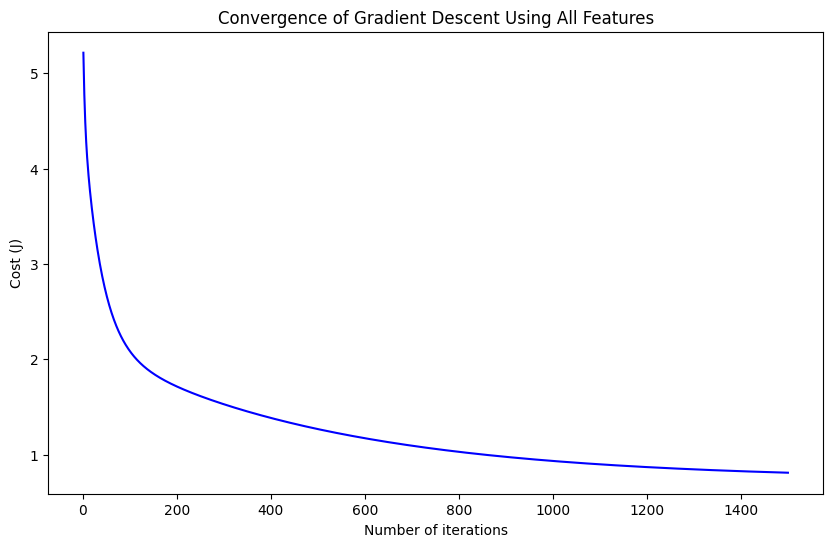

Final Linear Model: y = 4.151187282528127 + -1.839429097710375*X1 + 0.7247385609338923*X2 + -0.09513266408711536*X3


In [5]:
# Problem 2

# Train model with all features together
def train_with_all_features(X, y, alpha=0.01, iterations=1500):
    # Prepare data
    X_0 = np.ones((m, 1))
    X = np.hstack((X_0, X))

    # Initialize theta
    theta = np.zeros(X.shape[1])

    # Gradient descent
    theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

    # Plot loss over iterations
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, iterations + 1), cost_history, color='blue')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost (J)')
    plt.title(f'Convergence of Gradient Descent Using All Features')
    plt.show()

    return theta, cost_history[-1]

X_all_features = df[['X1', 'X2', 'X3']].values
theta_all, final_cost_all = train_with_all_features(X_all_features, y)
print(f'Final Linear Model: y = {theta_all[0]} + {theta_all[1]}*X1 + {theta_all[2]}*X2 + {theta_all[3]}*X3')


In [6]:
# Predicting values
def predict(theta, X):
    return np.dot(X, theta)

new_values = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
new_values = np.hstack((np.ones((new_values.shape[0], 1)), new_values))

predictions = predict(theta_all, new_values)

print("\nPredictions:")
print(f"For (X1, X2, X3) values (1, 1, 1): y = {predictions[0]}")
print(f"For (X1, X2, X3) values (2, 0, 4): y = {predictions[1]}")
print(f"For (X1, X2, X3) values (3, 2, 1): y = {predictions[2]}")


Predictions:
For (X1, X2, X3) values (1, 1, 1): y = 2.9413640816645295
For (X1, X2, X3) values (2, 0, 4): y = 0.09179843075891547
For (X1, X2, X3) values (3, 2, 1): y = -0.012755552822328653
